In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_text
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv('Student_Performance.csv')
data.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [44]:
print(data.isnull().sum())


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [45]:
data['Extracurricular Activities'].fillna(data['Extracurricular Activities'].mode()[0], inplace=True)


/var/folders/mx/vz440tc13r30000gjn16f5qw0000gn/T/ipykernel_85984/361553506.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [46]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})


In [47]:
data.head(25)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
5,3,78,0,9,6,61.0
6,7,73,1,5,6,63.0
7,8,45,1,4,6,42.0
8,5,77,0,8,2,61.0
9,4,89,0,4,0,69.0


In [48]:
X = data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 
          'Sleep Hours', 'Sample Question Papers Practiced']]
y = data['Performance Index']


In [49]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


IMPLEMENTING THE MODEL PRIOR TO HYPERPARAMETER TUNING

In [50]:
model = DecisionTreeRegressor(random_state=42, max_depth=5)
model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [51]:
y_pred = model.predict(X_test)


Accuracy and R^2 score prior to Hyperparameter Tuning

In [52]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 12.987047842797772
R^2 Score: 0.9649552902097726


Hyperparameter Tuning

In [53]:
params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(grid_search.best_params_)


{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


Initialising second model with above parameters

In [54]:
model = DecisionTreeRegressor(max_depth=10,min_samples_leaf=4,min_samples_split=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [55]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 5.842272061914145
R^2 Score: 0.984235006184344


MSE is decreased and R^2 is Increased after using new parameters

Simple Visualisation of the branches below

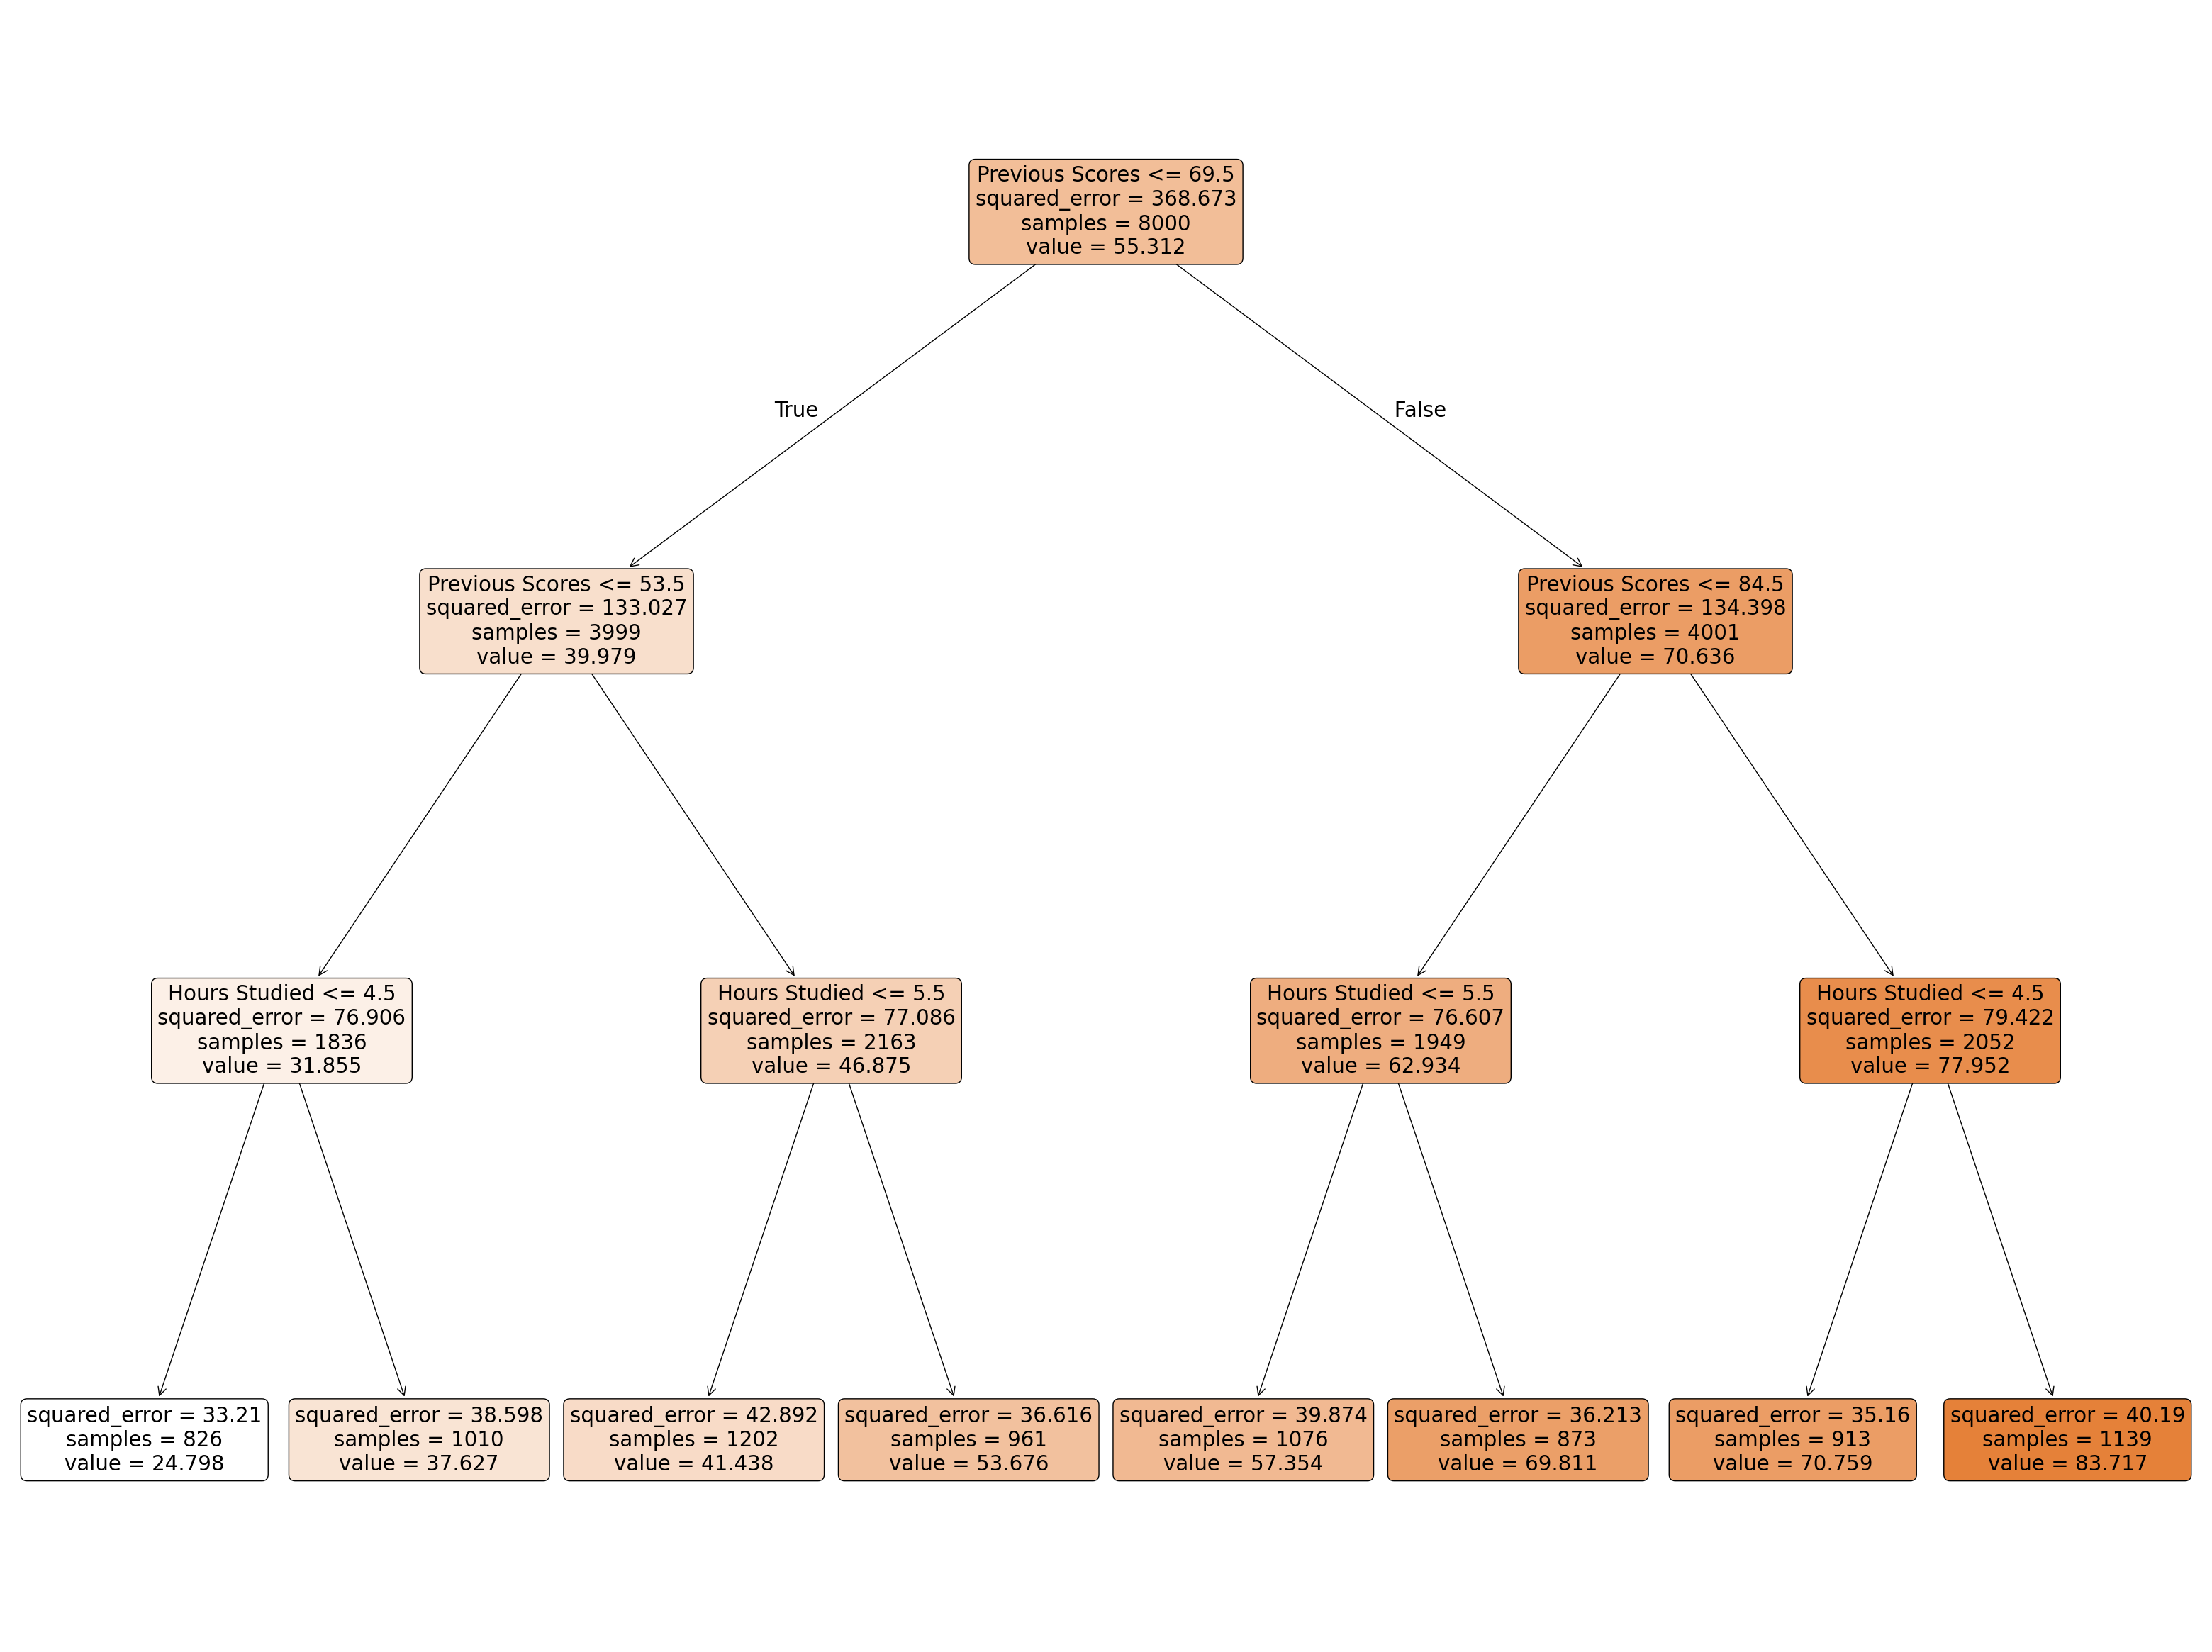

In [56]:
model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X_train, y_train)
plt.figure(figsize=(40, 30))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()


Complete tree visualisation below

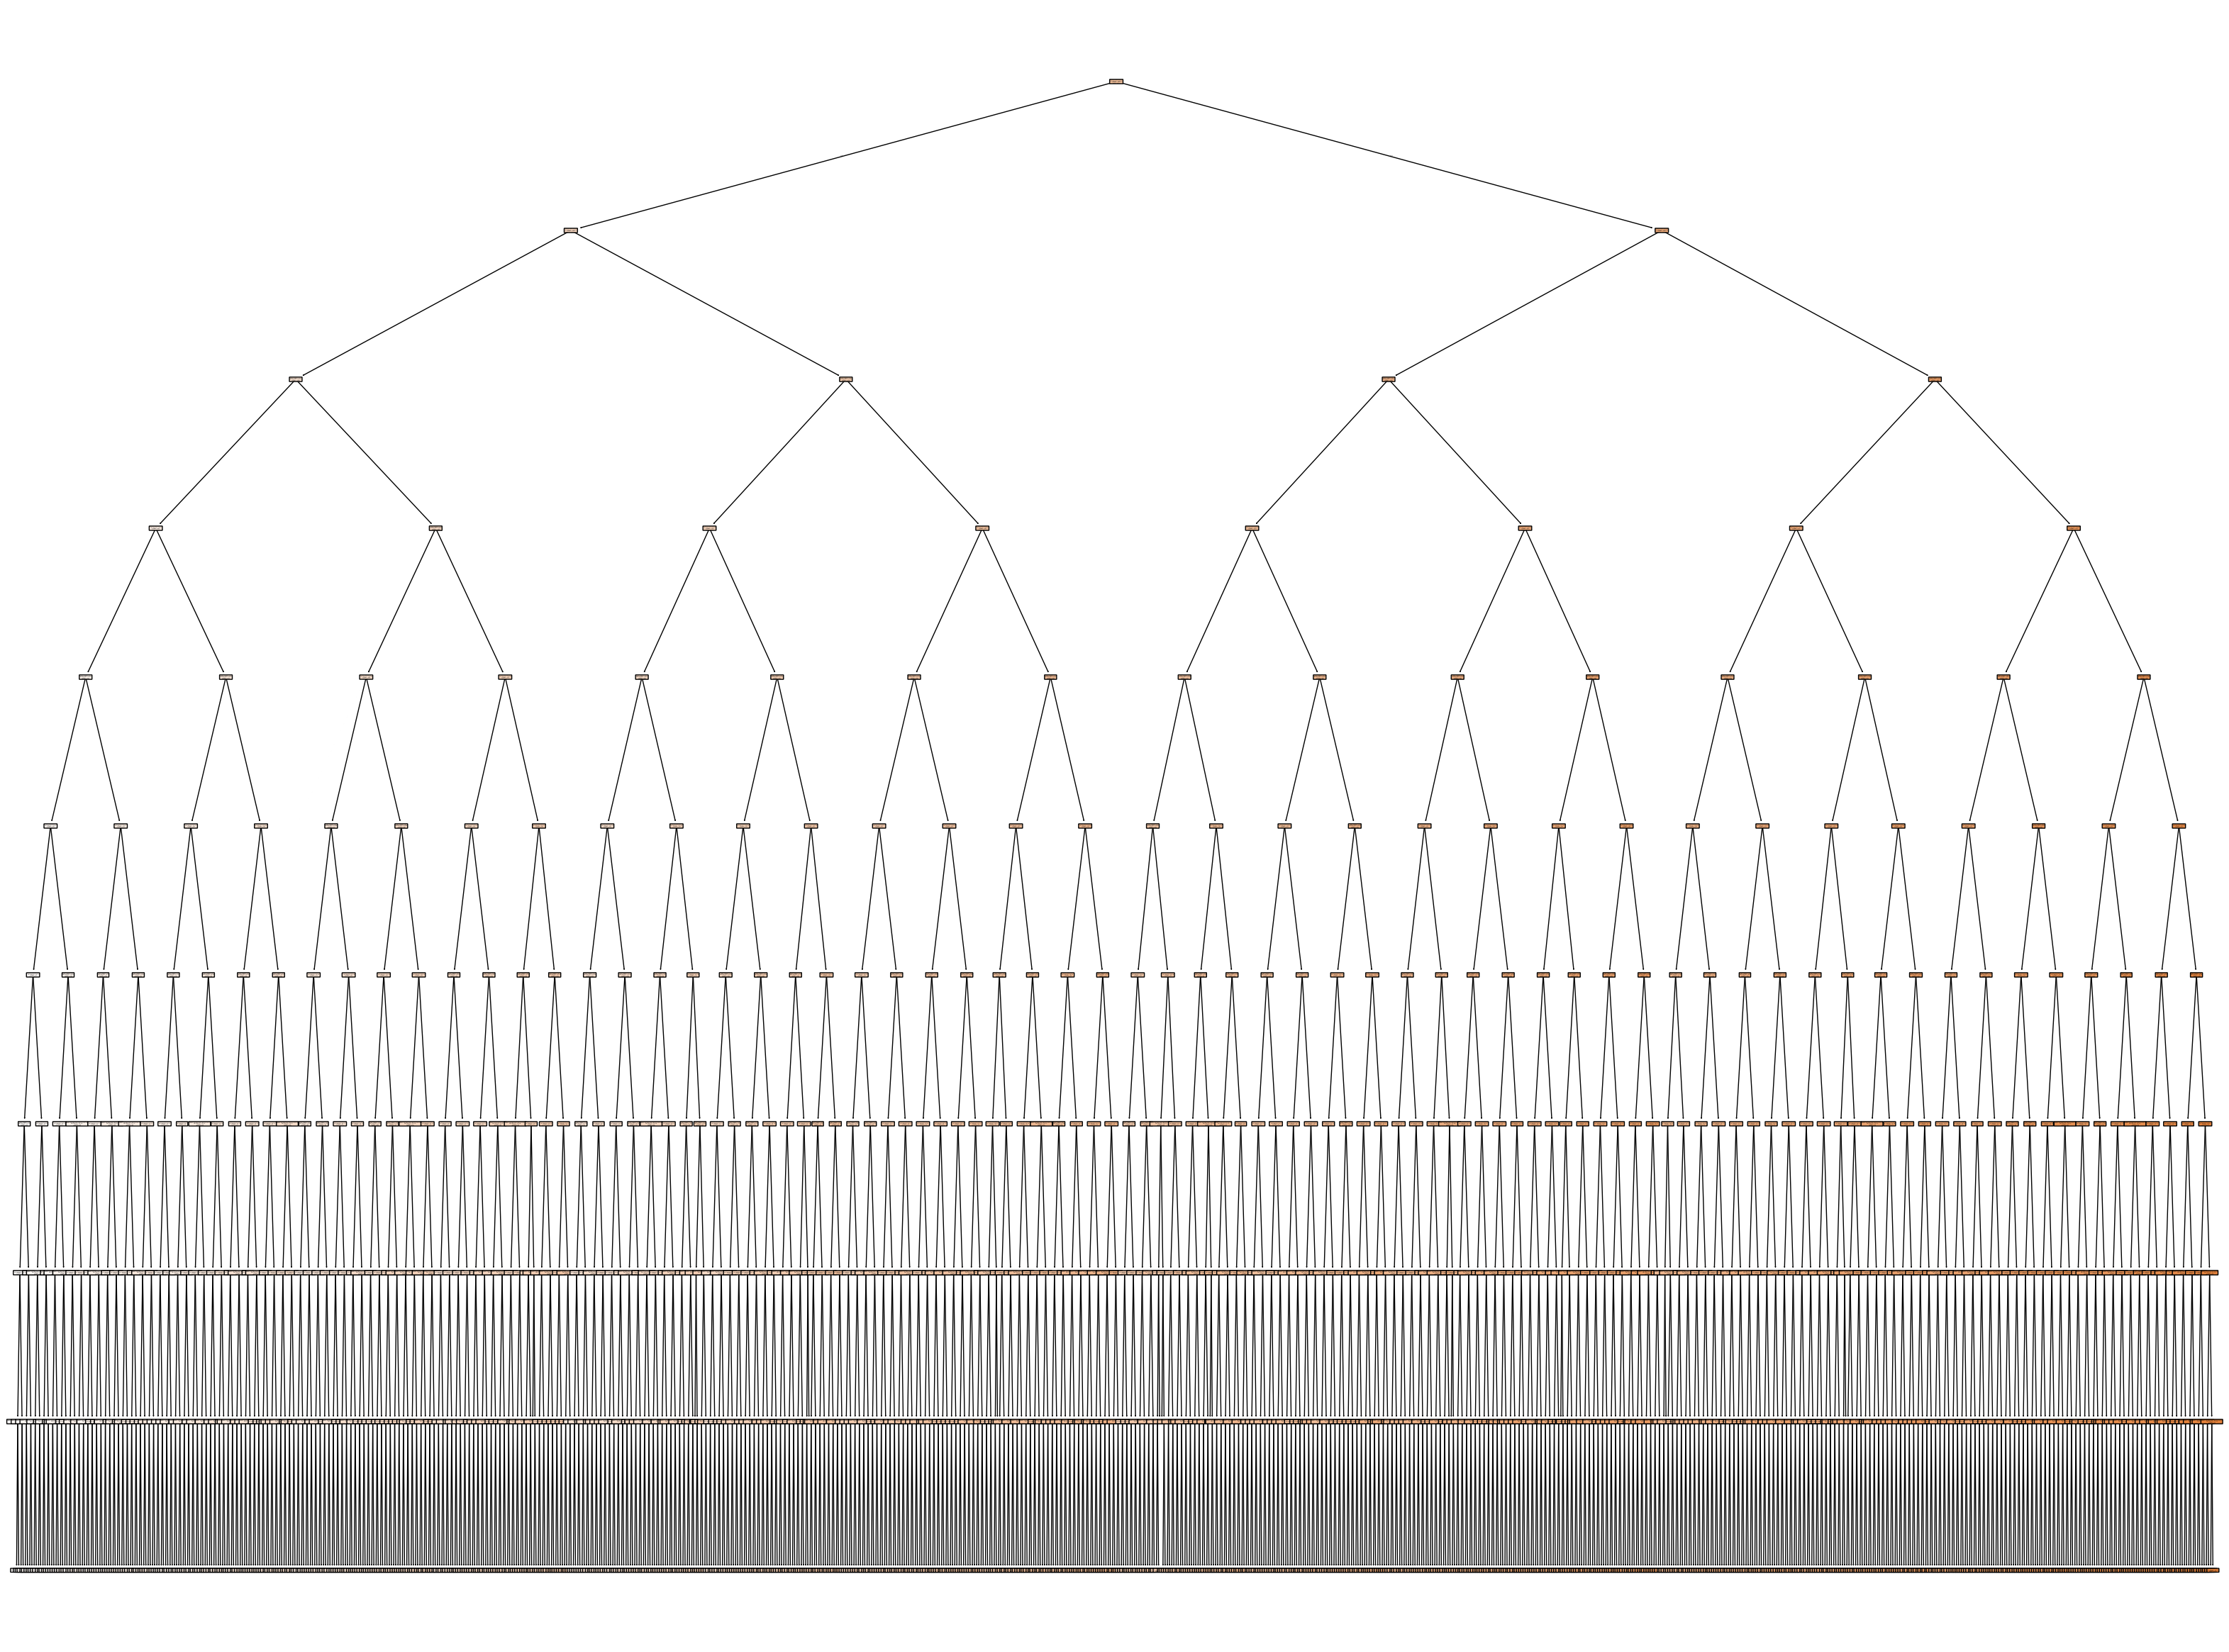

In [57]:
model = DecisionTreeRegressor(max_depth=10, random_state=42)
model.fit(X_train, y_train)
plt.figure(figsize=(40, 30))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()


In [58]:
tree_rules = export_text(model, feature_names=list(X.columns))
print(tree_rules)


|--- Previous Scores <= 69.50
|   |--- Previous Scores <= 53.50
|   |   |--- Hours Studied <= 4.50
|   |   |   |--- Previous Scores <= 46.50
|   |   |   |   |--- Hours Studied <= 2.50
|   |   |   |   |   |--- Previous Scores <= 42.50
|   |   |   |   |   |   |--- Previous Scores <= 41.50
|   |   |   |   |   |   |   |--- Hours Studied <= 1.50
|   |   |   |   |   |   |   |   |--- Previous Scores <= 40.50
|   |   |   |   |   |   |   |   |   |--- Sample Question Papers Practiced <= 8.50
|   |   |   |   |   |   |   |   |   |   |--- value: [13.50]
|   |   |   |   |   |   |   |   |   |--- Sample Question Papers Practiced >  8.50
|   |   |   |   |   |   |   |   |   |   |--- value: [12.00]
|   |   |   |   |   |   |   |   |--- Previous Scores >  40.50
|   |   |   |   |   |   |   |   |   |--- Sample Question Papers Practiced <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- value: [14.50]
|   |   |   |   |   |   |   |   |   |--- Sample Question Papers Practiced >  3.50
|   |   |   |   |   |   |